<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ready-for-Machine-Learning" data-toc-modified-id="Ready-for-Machine-Learning-1">Ready for Machine Learning</a></span></li></ul></div>

In [1]:
import pandas as pd
import pandas_datareader
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv('employee-attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,35
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,402.0 KiB
Average record size in memory,280.1 B
Numeric,22
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
cols = list(df.columns)
cols

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

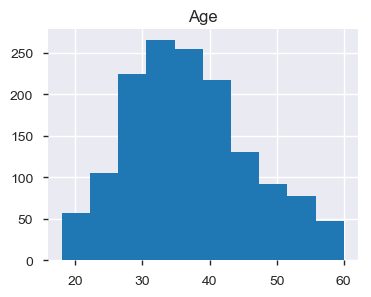

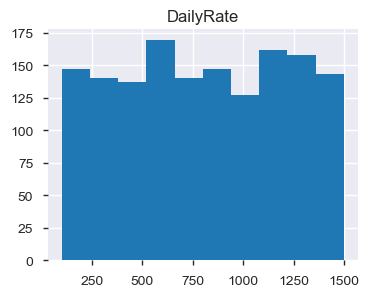

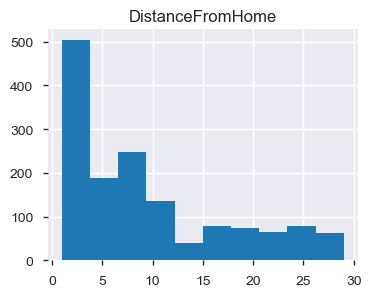

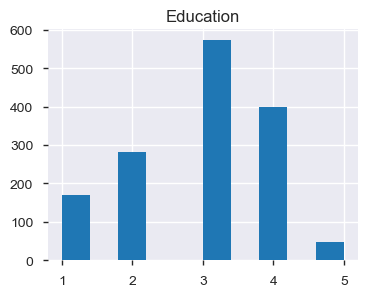

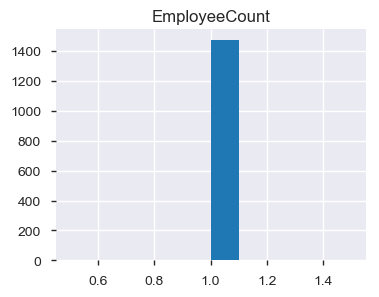

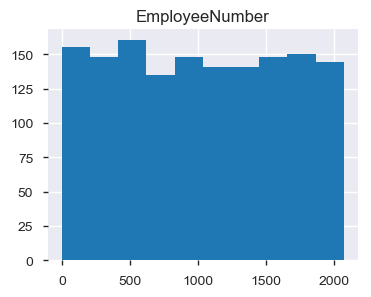

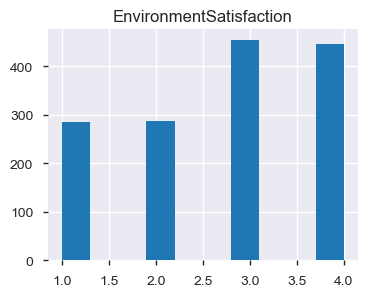

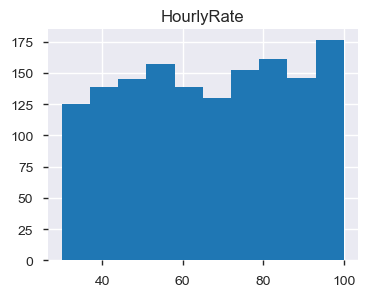

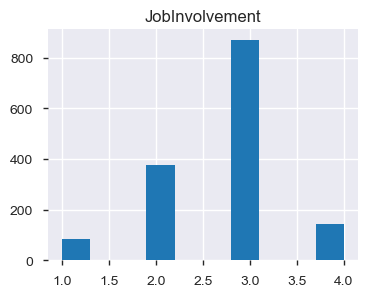

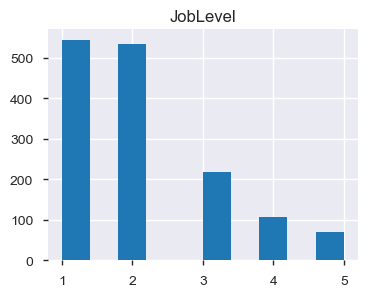

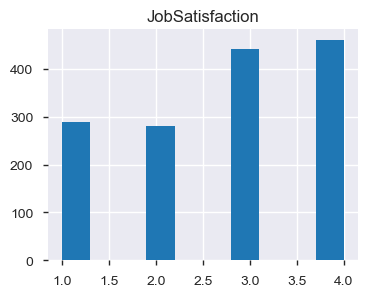

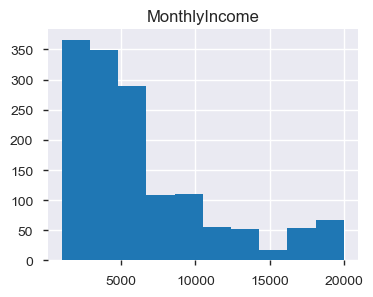

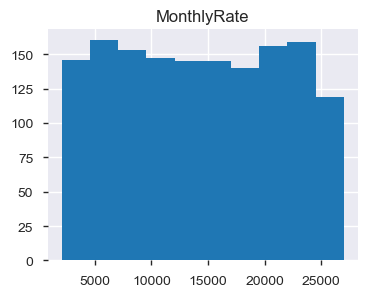

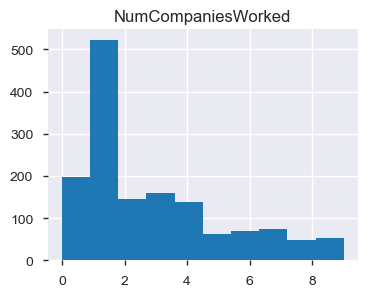

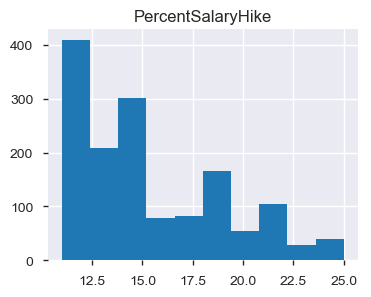

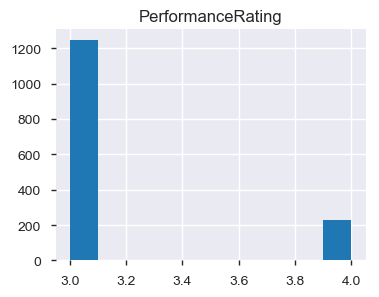

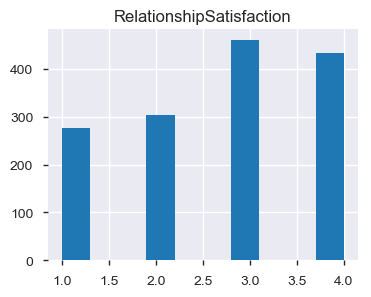

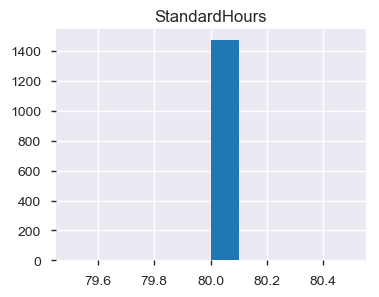

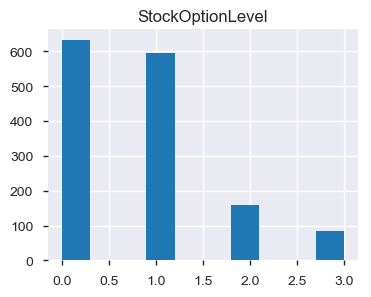

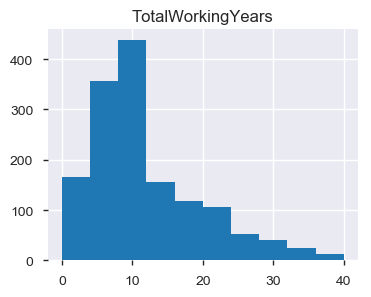

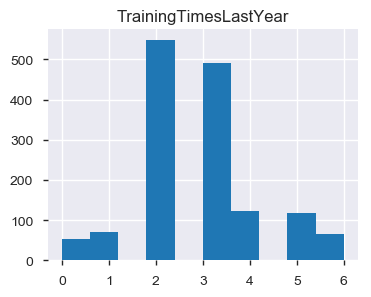

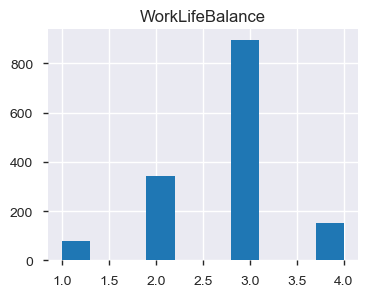

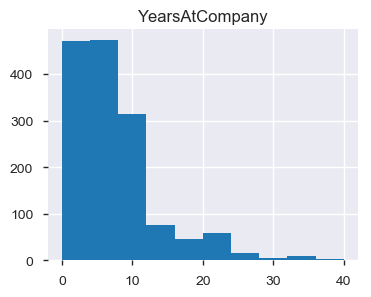

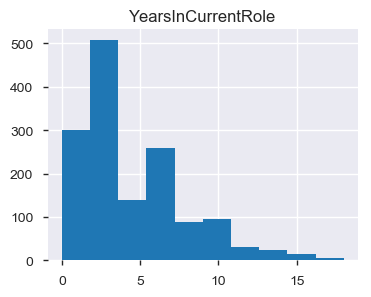

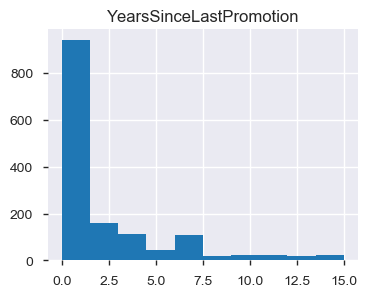

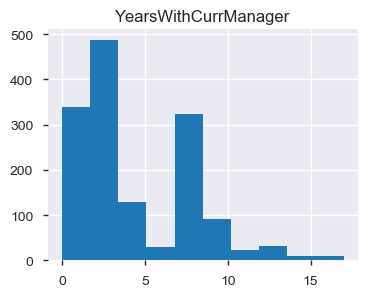

In [7]:
for col in cols:
    if df[col].dtype != 'int64':
        pass
    else:
        plt.figure(figsize=(4, 3))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [8]:
drops = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = df.drop(columns=drops)

In [9]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [12]:
df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
df.Gender.replace({'Male': 1, 'Female': 0}, inplace=True)
df.MaritalStatus.replace({'Married': 2, 'Single': 1, 'Divorced': 0}, inplace=True)
df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)

In [13]:
cats = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

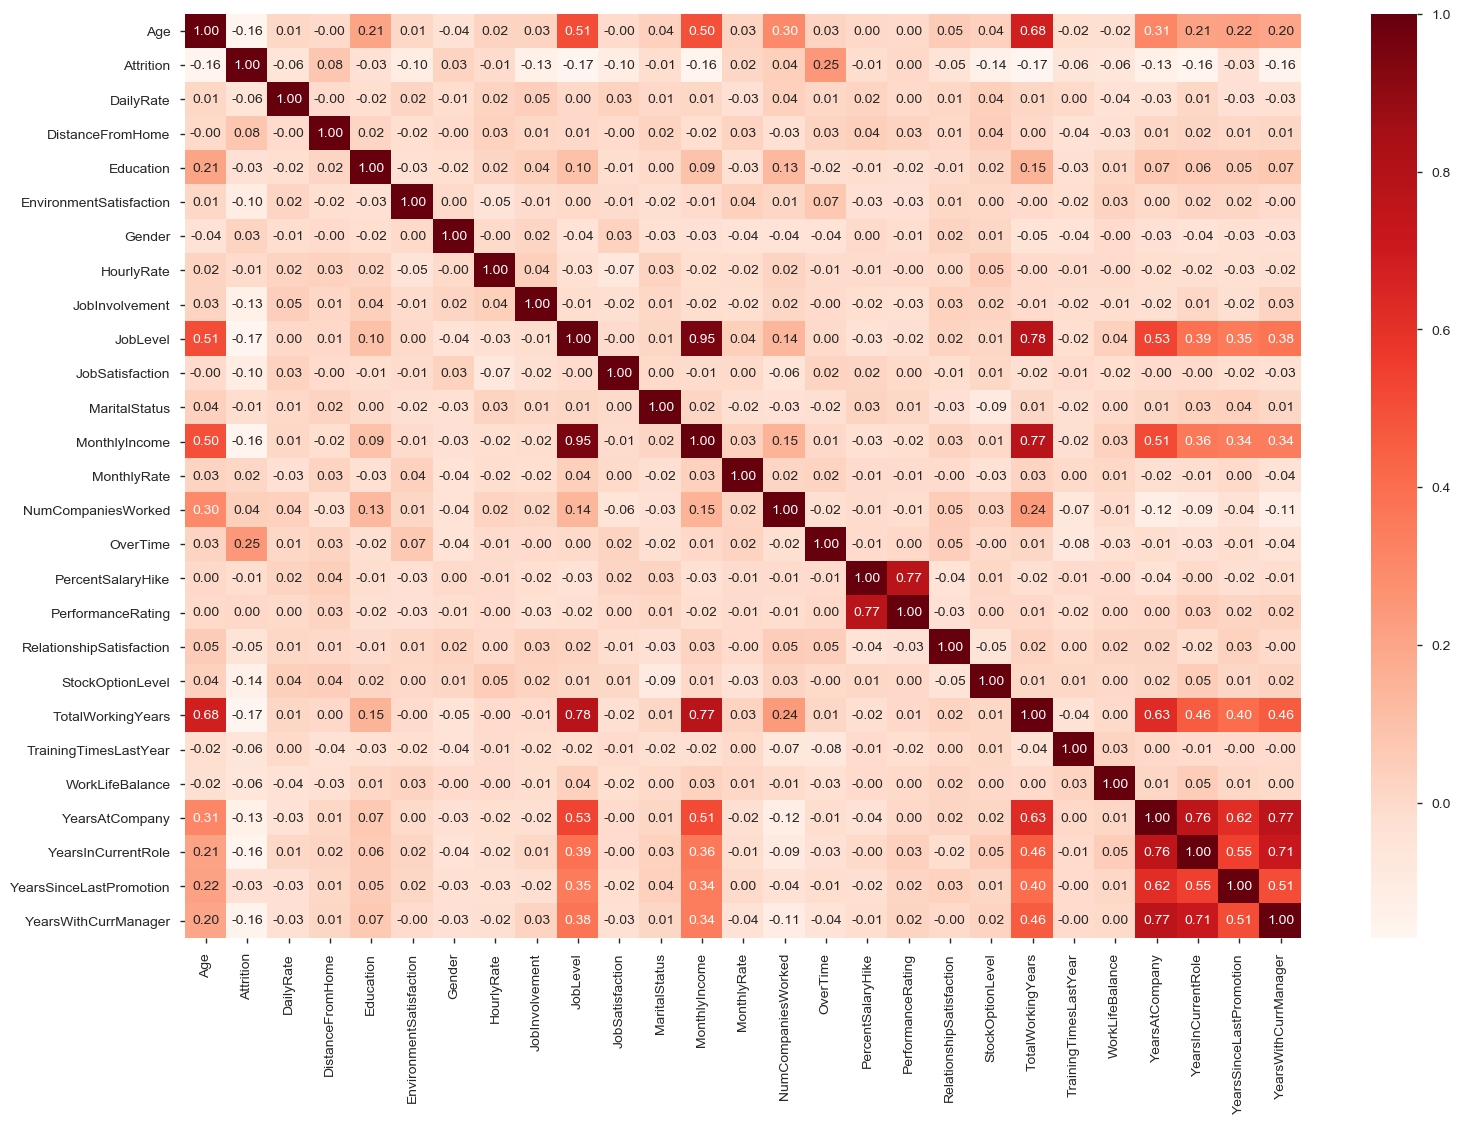

In [14]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f');

In [15]:
corr = ['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsInCurrentRole', 'Age']
df.drop(columns=corr, inplace=True)

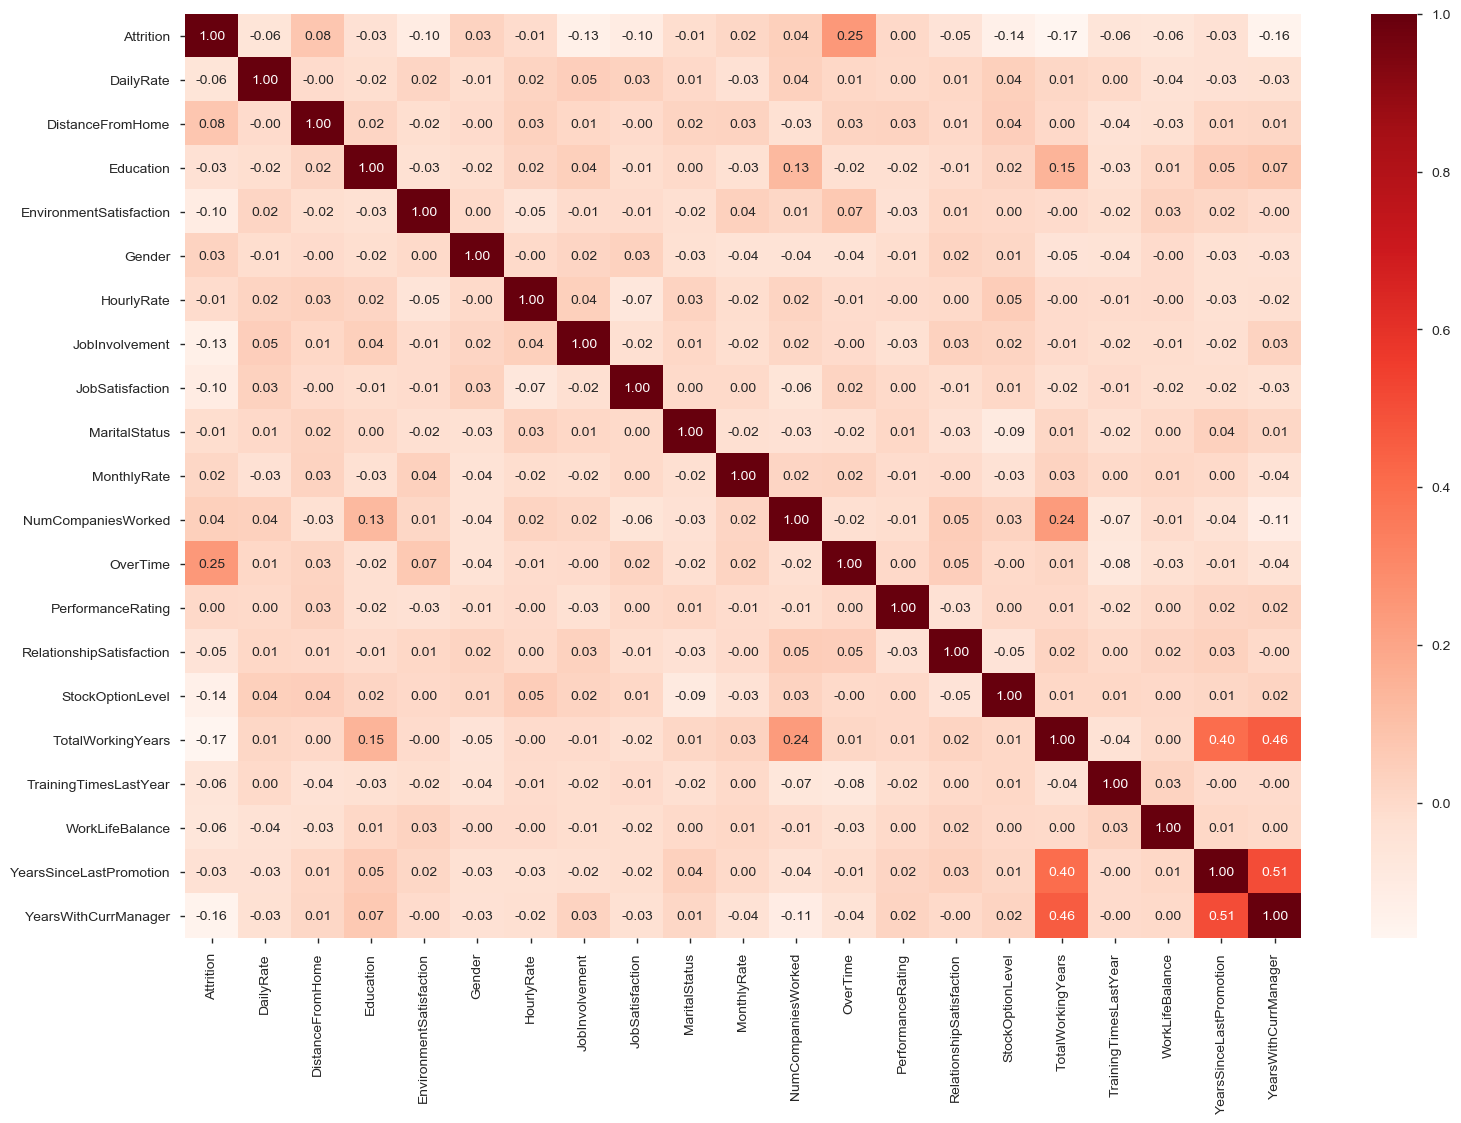

In [16]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f');

In [17]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobSatisfaction                      1470 non-null int64
MaritalStatus                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1

In [18]:
df.head()

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1102,1,2,2,0,94,3,4,1,...,0,0,0,0,0,0,0,0,1,0
1,0,279,8,1,3,1,61,2,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,1373,2,2,4,1,92,2,3,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1392,3,4,4,0,56,3,3,2,...,0,0,0,0,0,0,0,1,0,0
4,0,591,2,1,1,1,40,3,2,2,...,0,0,0,1,0,0,0,0,0,0


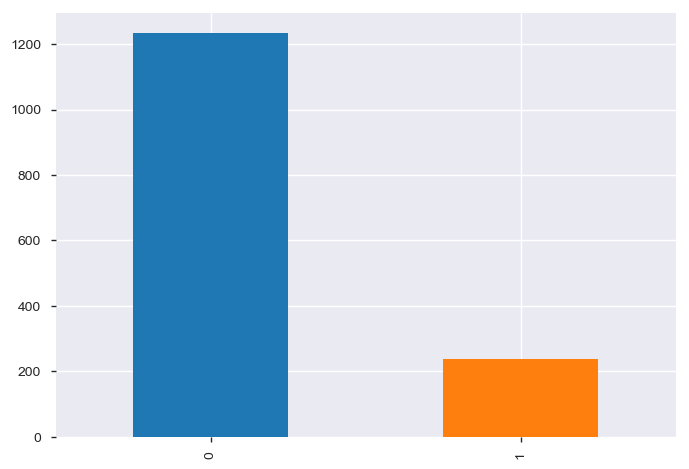

In [19]:
df.Attrition.value_counts().plot(kind="bar")

# Ready for Machine Learning

In [20]:
dtclf = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
gbclf = GradientBoostingClassifier()
adaclf = AdaBoostClassifier()
bagclf = BaggingClassifier() 

In [21]:
target = df.Attrition
features = df.drop(columns='Attrition')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1102, 41) (1102,)
(368, 41) (368,)


In [23]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
train_preds = dtclf.predict(X_train)

In [25]:
y_preds = dtclf.predict(X_test)

In [26]:
y_train.shape, y_preds.shape, y_test.shape, train_preds.shape

((1102,), (368,), (368,), (1102,))

In [27]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.7690217391304348

Test Recall=  0.32142857142857145

Test Precision=  0.27692307692307694

F1-Score=  0.2975206611570248


In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       312
           1       0.28      0.32      0.30        56

   micro avg       0.77      0.77      0.77       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.78      0.77      0.78       368



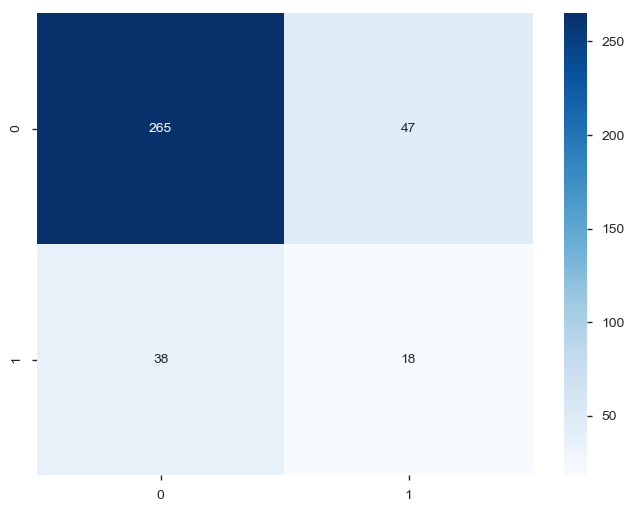

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [30]:
rfclf.fit(X_train, y_train)

/Users/steeznation/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_preds = rfclf.predict(X_test)

In [32]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8288043478260869

Test Recall=  0.08928571428571429

Test Precision=  0.29411764705882354

F1-Score=  0.136986301369863


In [33]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       312
           1       0.29      0.09      0.14        56

   micro avg       0.83      0.83      0.83       368
   macro avg       0.57      0.53      0.52       368
weighted avg       0.77      0.83      0.79       368



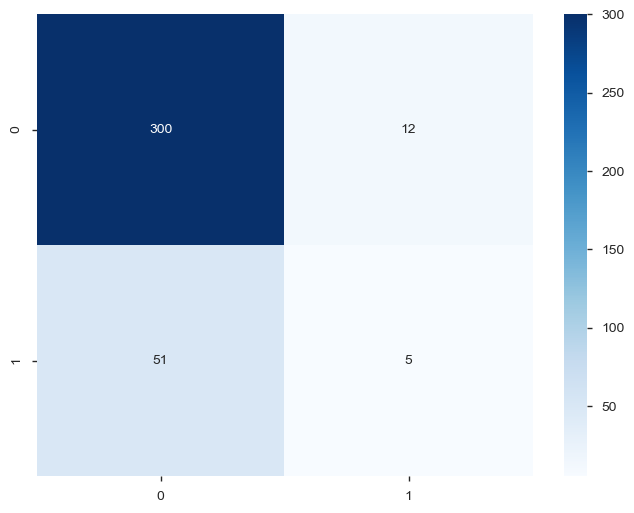

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [35]:
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [36]:
y_preds = gbclf.predict(X_test)

In [37]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8586956521739131

Test Recall=  0.25

Test Precision=  0.5833333333333334

F1-Score=  0.35000000000000003


In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       312
           1       0.58      0.25      0.35        56

   micro avg       0.86      0.86      0.86       368
   macro avg       0.73      0.61      0.64       368
weighted avg       0.83      0.86      0.83       368



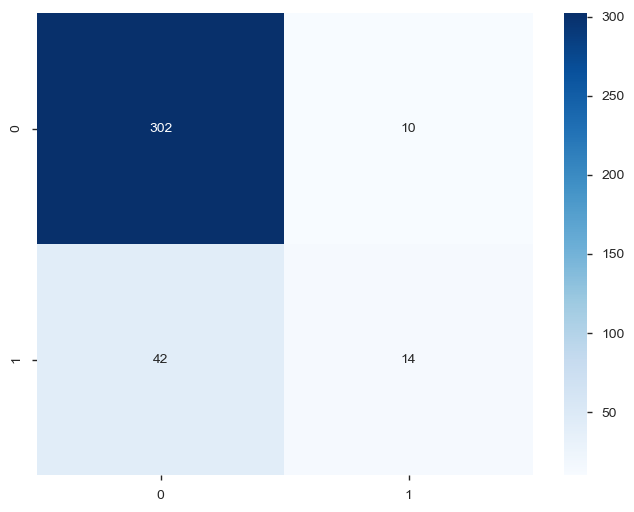

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [40]:
adaclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [41]:
y_preds = adaclf.predict(X_test)

In [42]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8722826086956522

Test Recall=  0.35714285714285715

Test Precision=  0.6451612903225806

F1-Score=  0.4597701149425288


In [43]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       312
           1       0.65      0.36      0.46        56

   micro avg       0.87      0.87      0.87       368
   macro avg       0.77      0.66      0.69       368
weighted avg       0.86      0.87      0.86       368



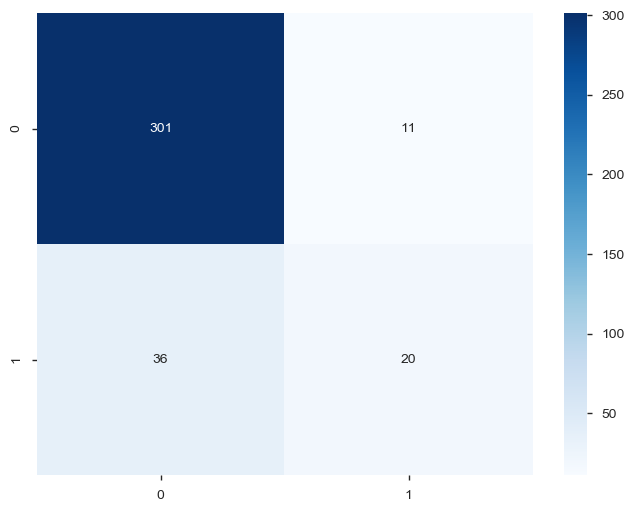

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

In [45]:
bagclf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [46]:
y_preds = bagclf.predict(X_test)

In [47]:
print("Test Accuracy= ", accuracy_score(y_test, y_preds))
print()
print("Test Recall= ", recall_score(y_test, y_preds))
print()
print("Test Precision= ", precision_score(y_test, y_preds))
print()
print("F1-Score= ", f1_score(y_test, y_preds))

Test Accuracy=  0.8342391304347826

Test Recall=  0.125

Test Precision=  0.3684210526315789

F1-Score=  0.18666666666666668


In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       312
           1       0.37      0.12      0.19        56

   micro avg       0.83      0.83      0.83       368
   macro avg       0.61      0.54      0.55       368
weighted avg       0.78      0.83      0.80       368



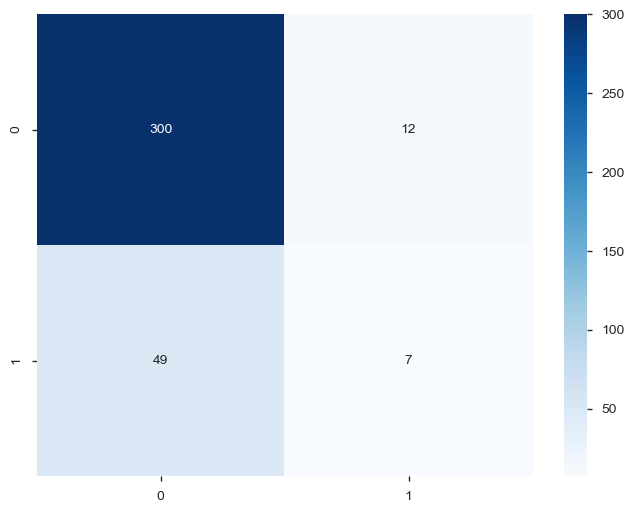

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='Blues', annot=True, fmt='.16g');

---

---

---

---

---

In [50]:
df = pd.read_csv('employee-attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
drops = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = df.drop(columns=drops)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [72]:
objs = []
for column in list(df.columns):
    if df[column].dtype == 'object':
        print(column, "is an object")
        objs.append(column)

Attrition is an object
BusinessTravel is an object
Department is an object
EducationField is an object
Gender is an object
JobRole is an object
MaritalStatus is an object
OverTime is an object


In [98]:
for obj in objs:
    print(obj.upper())
    print(df[obj].value_counts())
    print()
    print('*' * 50)
    print()

ATTRITION
No     1233
Yes     237
Name: Attrition, dtype: int64

**************************************************

BUSINESSTRAVEL
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

**************************************************

DEPARTMENT
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

**************************************************

EDUCATIONFIELD
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

**************************************************

GENDER
Male      882
Female    588
Name: Gender, dtype: int64

**************************************************

JOBROLE
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Repr